# Problem 1 Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
class LogisticRegressionGD:
    def __init__(self, lr=0.01, fit_intercept=True, max_epoch=1e5, tolerance=1e-7, verbose=True):
        self.lr = lr
        self.fit_intercept = fit_intercept
        self.max_epoch = max_epoch
        self.tolerance = tolerance
        self.verbose = True

    def add_intercept(self, X):
        # add an extra column for the intercept
        intercept = np.ones([X.shape[0], 1])
        return np.concatenate((intercept, X), axis=1)

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def cost_function(self, h, y):
        # calculate the loss
        # return the loss
        # TODO
        
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()

    def fit(self, X, y):
        '''
        Parameters
        ----------
        X : shape (n_samples, n_features)
            Training data
        y : shape (n_samples,)
            Target values, 1 or 0
        epochs : The number of epochs
        '''
        # initialize the parameters
        if self.fit_intercept:
            X = self.add_intercept(X)
        
        # initialize the coefficients
        self.theta = np.zeros(X.shape[1])

        tol = 1e10
        n_epoch = 1
        while tol > self.tolerance and n_epoch <= self.max_epoch:
            old_theta = self.theta.copy()
            
            # TODO:
            # calculate predictions
            # pred.shape: [n_samples, 1]
            pred = np.asarray(self.predict(X, threshold=0.5))
            pred = np.transpose(pred)
            
            # calculate gradients
            # grad.shape:  [n_features, 1]
            
            p = self.sigmoid(np.dot(X, self.theta))
            gradient = -(1 / len(X)) * np.dot(X.T, y - p)
            
            # update the coefficients
            self.theta -= self.lr * gradient
            
            # END
            
            n_epoch += 1
            tol = np.sum(np.abs(self.theta - old_theta))

    def predict(self, X, threshold):
        """
        Parameters
        ----------
        X : shape (n_samples, n_features)
        threshold : threshold for make decision
        Returns
        -------
        y : shape (n_samples,)
            Predicted class label per sample, 1 or 0
        """
        # TODO
        
        # add the intercept to X
        self.add_intercept(X)
        
        # get the prediction y
        prob = self.sigmoid(np.dot(X, self.theta))
        
        # return prediction y
        return [1 if x >= threshold else 0 for x in prob]

## 1.1 Fit a logistic regression model

In [3]:
# read the data, transform the target variable y to 0/1 values
# TODO

# import numpy as np
# df_X = pd.read_csv('logistic_x.txt', header=None, delim_whitespace=True)
# y = pd.read_csv('logistic_y.txt', header=None)
# y.replace(-1, 0, inplace=True).values
# y = y.astype(int)
# y.loc[s[0]==-1, 0] = 0
# df_X['label'] = y

# # fit a logistic regression model
# X = df_X[[0, 1]].values
# y = df_X['label'].values

# read the data
df_X = pd.read_csv('logistic_x.txt', sep='\ +', header=None, engine='python')
ys = pd.read_csv('logistic_y.txt', sep='\ +', header=None, engine='python')
ys = ys.astype(int)
ys.loc[ys[0]==-1, 0] = 0
df_X['label'] = ys


# fit a logistic regression model
X = df_X[[0, 1]].values
y = df_X['label'].values

In [4]:
# fit the model using the data, and print out the model coefficients w
# we include the intercept term, so w is a vector with 3 components
# print out the model coeffcients
# TODO
LRmodel = LogisticRegressionGD()
LRmodel.fit(X, y)
print(LRmodel.theta)

[-2.62004691  0.76026934  1.17191257]


## 1.2 Plot the training data and the decision boundary

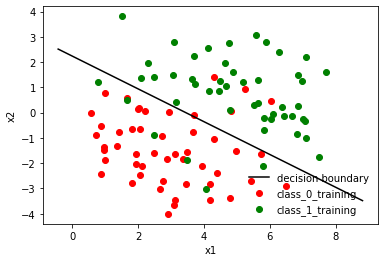

In [5]:
# plot the training data (x axis: first feature, y axis: second feature), use different labels for the two classes

# on the same figure, plot the boundary, a straight line showing the boundary separating p>0.5 from p<=0.5

# TODO
y_0_filter = ys[0] == 0
y_1_filter = ys[0] == 1
plt.figure()

plt.scatter(X[y_0_filter][:,0], X[y_0_filter][:,1], color='r', label='class_0_training')
plt.scatter(X[y_1_filter][:,0], X[y_1_filter][:,1], color='g', label='class_1_training')

x1 = [np.min(X[:, 0] - 1), np.max(X[:, 1] + 5)]
x2 = [(LRmodel.theta[0]+LRmodel.theta[1]*i)/-LRmodel.theta[2] for i in x1]
plt.plot(x1,x2, c='k', label='decision boundary')

plt.legend(loc='lower right', frameon=False)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()